# Cours d'informatique TSI2

- [La méthode d'Euler](#euler)
- [Les piles](#piles)
- [La Récursivité](#recursivite)
- [Méthodes de tri](#tris)
  - [Tri par insertion](#triInsertion)
  - [Tri rapide](#triRapide)
  - [Tri fusion](#triFusion)

<a id='euler'></a>
## La méthode d'Euler

La méthode d'Euler est une méthode numérique de résolution d'équations différentielles. Nous allons montrer le principe de la méthode et son application pour résoudre numériquement une équation différentielle d'ordre 1.

### Principe de la méthode

On souhaite résoudre numériquement une équation différentielle de la forme $$\frac{dy}{dt}=f(y,t)$$ associée à la condition initiale $y(0)=y_0$

Par exemple l'équation différentielle : $\frac{dy}{dt} = \cos(t)\sin(y)$, dans ce cas $f(y,t)=\cos(t)\sin(y)$. Ou plus simplement $\frac{dy}{dt}+4y=0$ où $f(y,t)=-4y$. L'équation différentielle est définie par la fonction $f(y,t)$ qui est une donnée du problème.

On utilise un développement à l'ordre 1 de la fonction $y$ : $$y(t+dt)\simeq y(t) + y'(t)dt$$
soit
$$y(t+dt)\simeq y(t)+f(y(t),t)dt$$

Donc connaissant la condition initiale $y(0)=y_0$ on peut calculer $y(dt)$ puis $y(2dt)$, etc.

L'approximation utilisée revient à identifier la courbe représentative de $y(t)$ à sa tangente en tout point.

### Programmation en python

Nous allons résoudre numériquement l'équation différentielle
$$y'+4y=0$$ 
avec $y(0)=10$.On peut en calculer la solution exacte:
$$y(t)=10e^{-4t}$$
On a alors $f(y,t)=-4y$ que l'on définit comme une fonction python :

In [2]:
def f(y,t):
    return -4*y

Puis on écrit la fonction `euler` qui calcule les valeurs successives de $y$ et $t$.

In [3]:
def euler(f,y0,dt,tmax):
    y=[y0]
    t=[0]
    while(t[-1]<tmax):
        y.append(y[-1]+dt*f(y[-1],t[-1]))
        t.append(t[-1]+dt)
    return [t,y]

On utilise la fonction précédente pour calculer la solution de l'équation différentielle :

In [4]:
t,y=euler(f,10,0.01,1)

Représentons graphiquement les valeurs de $y(t)$ calculées ainsi que la solution exacte.

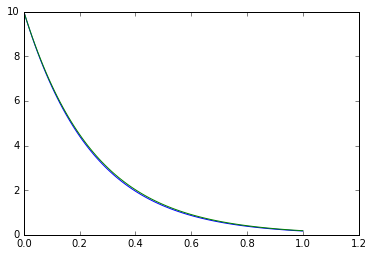

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import *

def fth(t):
    return 10*exp(-4*t)

yth = [fth(i) for i in t]
plt.plot(t,y)
plt.plot(t,yth)

On peut voir l'influence du *pas* en résolvant l'équation différentielle avec des pas différents :

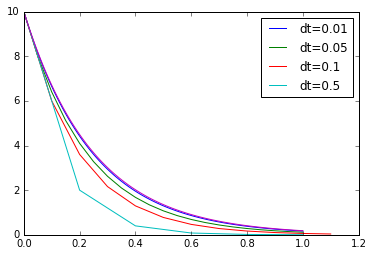

In [6]:
t1,y1=euler(f,10,0.01,1)
t2,y2=euler(f,10,0.05,1)
t3,y3=euler(f,10,0.1,1)
t4,y4=euler(f,10,0.2,1)
plt.plot(t1,y1,label="dt=0.01")
plt.plot(t2,y2,label="dt=0.05")
plt.plot(t3,y3,label="dt=0.1")
plt.plot(t4,y4,label="dt=0.5")
plt.plot(t,yth)
plt.legend()

Il est clair que plus le pas est petit, plus la solution numérique est proche de la solution exacte.

On peut également évaluer la complexité en temps de cet algorithme. La boucle principale de la fonction `euler` est executée autant de fois qu'il y a de points à calculer dans l'intervalle $[0-t_{max}]$. Soit pour un pas de $dt$ la boucle s'exécute $N=\frac{t_{max}}{dt}$ fois. Donc plus $dt$ est faible plus le temps d'exécution du programme est grand. On ne peut donc pas choisir un pas arbitrairement petit. Il faut trouver le bon compromis entre précision de la solution et temps de calcul acceptable.

> #### Exercice
> 
> Comment modifier la fonction `euler` ci-dessus pour résoudre une équation différentielle d'ordre 2

<a id='piles'></a>
## Les Piles

### Définition

Une pile est une structure de données qui permet de stocker plusieurs éléments dans leur ordre d'arrivée et d'y accéder dans l'ordre inverse. C'est comme une pile d'assiettes : la dernière posée sur le pile est la première en en ressortir (dernier entré premier sorti, en anglais LIFO).

Pour manipuler une pile on a besoin d'au moins deux fonctions : 

- Une fonction `push()` qui ajoute un élément au sommet de la pile ;
- Une fonction `pop()` qui retire l'élément du sommet de la pile.

On a également souvent d'autres fonctions qui permettent de savoir si une pile est vide, combien d'éléments elle contient, de vider une pile, ...

On peut facilement implémenter une pile en python grace à une liste et aux fonctions `append()` qui ajoute un élément à la fin de la liste et `pop()` qui retire et renvoie l'élément en fin de liste :

In [12]:
A=[]
A.append(10)
A.append(20)
A.append(30)
print(A)
print(A.pop())
print(A)
print(A.pop())
print(A)

[10, 20, 30]
30
[10, 20]
20
[10]


### Applications

#### Dans l'execution d'un programme

Lors de l'execution d'un programme, les instructions executées par l'ordinateur sont lues à partir de la mémoire et sont repérées par leur *adresse* dans la mémoire. Lorsqu'une instruction d'appel à une fonction est rencontrée, le programme doit *sauter* à l'adresse mémoire correspondante et continuer son execution. À la fin de l'execution de la fonction, le programme doit reprendre là où il s'était arrêté, il faut donc qu'il ait enregistré l'adresse d'où il venait avant d'arriver dans la fonction.

L'enregistrement des adresses de retour se fait dans une *pile* (*stack* en anglais). Chaque appel de fonction empile l'adresse de retour et chaque retour de fonction dépille une adresse.

*Remarque :* La pile a une taille finie, donc un programme ne peut appeler un nombre arbitraire de fonctions imbriquées. 

#### Comme structure de données

Les piles sont utilisées comme structure de données par exemple pour stocker les adresses visitées par un navigateur internet, le bouton *précédent* dépile la dernière adresse visitée. Un autre exemple et la fonction d'annulation de la dernière action dans un éditeur de texte. Chaque action est empilée dans une pile et permet d'annuler toutes les actions dans l'ordre inverse.

### Exercices

> #### Exercice 1 :
> 
> Écrire une fonction python `estVide(P)` qui renvoie `True` si une pile `P` stockée sous forme de liste est vide et `False` sinon.

In [13]:
def estVide(P):
    if(len(P)==0):
        return True
    else:
        return False

> #### Exercice 2 :
> 
> Écrire une fonction `renverse(P)` qui inverse l'ordre des éléments d'une pile `P` en utilisant uniquement les instructions `append()`, `pop()` et `estVide()`.

In [16]:
def renverse(P):
    Q=[]
    while(not estVide(P)):
        Q.append(P.pop())
    return Q

print(renverse([10,11,12,13]))

[13, 12, 11, 10]


La complexité de cette fonction est $O(n)$ où $n$ est le nombre d'éléments de la liste `P`.

> #### Exercice 3 :
> 
> Écrire une fonction `testParentheses(chaine)` qui renvoie `True` si l'enchaînement des parenthèses, crochets ou accolades ouvrantes et fermantes de la chaine `chaine` est correcte et `False` sinon. (épreuve du challenge informatique !)

<a id='recursivite'></a>
## Récursivité

### Définition

> ### Pour comprendre la récursivité, il faut savoir ce qu'est la récursivité. 
> B. Becler

Une fonction récursive est une fonction qui a besoin d'elle-même pour fonctionner, c'est une fonction qui s'appelle elle-même.

### Applications

Beaucoup d'algorithmes s'écrivent plus facilement de manière récursive. L'exemple classique est celui d'une fonction qui calcule la factorielle d'un entier n. En effet on a mathématiquement la définition récursive suivante :
$$n! = n\times(n-1)! \;\; \text{avec} \;\; 0!=1$$

Que l'on peut traduire en python de la manière suivante :

In [4]:
def fact(n):
    if n==0 :
        return 1
    else:
        return n*fact(n-1)

# Testons cette fonction :
print(fact(5))

120


On peut comprendre l'exécution de la fonction précédente en lui ajoutant quelques print :

In [9]:
def fact(n):
    if n==0 :
        print("fact(0)=1")
        return 1
    else:
        print("fact(",n,")=",n,"x","fact(",n-1,")")
        return n*fact(n-1)

# Testons cette fonction :
print(fact(5))

fact( 5 )= 5 x fact( 4 )
fact( 4 )= 4 x fact( 3 )
fact( 3 )= 3 x fact( 2 )
fact( 2 )= 2 x fact( 1 )
fact( 1 )= 1 x fact( 0 )
fact(0)=1
120


Les suites récurentes se prètent aussi particulièrement bien (comme leur nom l'indique) à un algorithme récursif. Par exemple la suite de fibonnacci est définie par :

$$ f_{n}=f_{n-1}+f_{n-2} \quad \text{avec} \quad f(0)=f(1)=1$$

Que l'on peut traduire par la fonction python suivante qui calcule le nième terme de la suite de fibonnacci.

In [20]:
def fibo(n):
    if n==0 or n==1:
        return 1
    else:
        return fibo(n-1)+fibo(n-2)

for i in range(6):
    print(fibo(i))

1
1
2
3
5
8


> **Exercice :**
>
>Écrire une fonction récursive qui calcule $a^b$ ($a$ est un nombre réel et $b$ un nombre entier positif) en utilisant uniquement des multiplications. Modifier votre fonction pour qu'elle fonctionne aussi lorsque $b$ est un entier négatif.

### Avantages et inconvénients

Pour voir quels sont les avantages et les inconvénients de la programmation récursive écrivons deux versions de la fonction `fibo(n)` ci-dessus.

La première version est la version récursive écrite plus haut :

In [4]:
def fiboRec(n):
    if n==0 or n==1:
        return 1
    else:
        return fiboRec(n-1)+fiboRec(n-2)

Et la seconde est une version itérative :

In [5]:
def fiboIter(n):
    u0=1
    u1=1
    if n>1:
        for i in range(n-1):
            u0,u1=u1,u0+u1
        return u1
    else:
        return 1

Le principal avantage de la programmation de fonctions récursives est qu'elle permet très souvent d'obtenir un code très clair et concis. La fonction `fiboRec` est plus simple que sa version itérative `fiboIter`.

Par contre l'écriture de fonctions récursive peut poser un certain nombre de problèmes. Le premier étant que la *profondeur de récursivité* c'est à dire le nombre d'appels récursifs d'une fonction donnée est limité. En effet à chaque appel, l'ordinateur doit conserver en mémoire la position où il se trouvait dans la fonction elle même et si le nombre d'appel récursif est grand, la quantité de données à garder en mémoire peut commencer à devenir importante. Pour mettre en évidence cette limite on peut essayer :

In [30]:
fiboRec(1000)

RecursionError: maximum recursion depth exceeded in comparison

Alors que la fonction itérative ne pose pas ce problème :

In [6]:
fiboIter(1000)

70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501

Le second problème est qu'une fonction récursive peut être beaucoup moins performante qu'une fonction itérative. À titre d'exemple, comparons le temps d'exécution des deux versions de la fonction `fibo`

In [21]:
%%timeit
fiboRec(10)

10000 loops, best of 3: 60.6 µs per loop


In [20]:
%%timeit
fiboIter(10)

The slowest run took 4.47 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.88 µs per loop


La version itérative de la fonction s'execute environ 30 fois plus rapidement que la version itérative. Pour comprendre pourquoi déterminons la complexité de ces deux versions.

#### Version itérative
La boucle principale de la fonction est exécutée $n-1$ fois donc la complexité est $C_{iter}=O(n)$. La complexité de cette fonction est donc linéaire. Vérifions-le expérimentalement :

In [33]:
def sansArgument(f,n):
    def fonc():
        return f(n)
    return fonc

import timeit
tpsIter=[]
for i in range(3,200):
    tpsIter.append(timeit.timeit(sansArgument(fiboIter,i),number=1000))

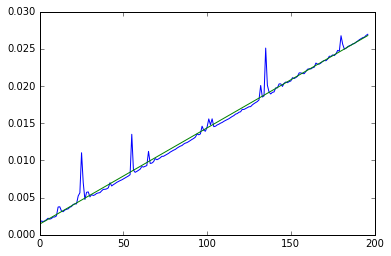

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
x=[float(v) for v in range(3,200)]
def f(x,a,b):
    return a*x+b
p,c=curve_fit(f,x,tpsIter)
fit=[f(v,p[0],p[1]) for v in range(3,200)]
plt.plot(tpsIter)
plt.plot(fit)

#### Version récursive
Appelons $C_{rec}(n)$ la complexité de la fonction `fiboRec(n)`. On a la relation de récurence :

$$C_{rec}(n) = C_{rec}(n-1) + C_{rec}(n-2) \quad \text{avec} \quad C_{rec}(0)=C_{rec}(1)=1$$

Qui est exactement la relation de récurence définissant la suite de Fibonacci. Donc $C_{rec}(n)=\text{fibo}(n)$, or on sait que le nième terme de la suite de Fibonacci est donné par la [formule de Binet](https://fr.wikipedia.org/wiki/Jacques_Philippe_Marie_Binet#Formule_de_Binet) :

$$
\mathcal F_n=\frac1{\sqrt5}(\varphi^n-\varphi'^n),\qquad\text{avec}\qquad\varphi=\frac{1+\sqrt5}2\qquad\text{et}\qquad \varphi'=-\frac1\varphi.
$$

Donc finalement $C_{rec}(n)=\mathcal F_n = O(\varphi^n)$ qui est une complexité exponentielle. Vérifions-le expérimentalement :

In [39]:
tpsRecur=[]
for i in range(30):
    tpsRecur.append(timeit.timeit(sansArgument(fiboRec,i),number=1))

[  6.74559469e-07   2.12149075e+00]


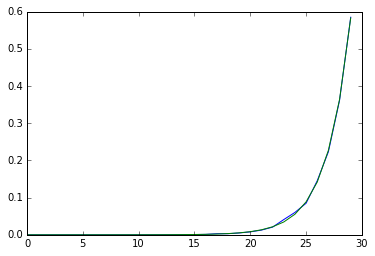

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from math import *
def g(x,a,b):
    return a*exp(x/b)
x=[float(v) for v in range(30)]
p,c=curve_fit(np.vectorize(g),x,tpsRecur,[1,2])
fitExp=[g(v,p[0],p[1]) for v in range(30)]
plt.plot(tpsRecur)
plt.plot(fitExp)
print(p)

>  #### Exercices :

> Écrire une fonction récursive qui détermine si une chaine de caractères est un palindrôme. Un palindrôme est une chaine de caractères qui se lit de la même manière dans les deux sens comme 'radar'

> Écrire une fonction récursive qui calcule la valeur d'un nombre stocké dans une chaîne de caractères.

> Écrire une fonction récursive qui effectue la division euclidienne d'un nombre entier `a` par un autre nombre entier `b` et renvoie le quotient et le reste.

> Utiliser la bibliothèque [turtle](https://docs.python.org/3.6/library/turtle.html) et des fonctions récursives pour dessiner les figures fractales ci-dessous:

![Fractale 1](images/IMG-fract.png)

Pour dessiner cette fractale, on commence par écrire une fonction `triangle(x,y,s)` qui dessine un triangle de côté `s` et de coordonnées `x` et `y`. 

Puis on écrit une fonction `fractale(x,y,s,n)` qui :
- Dessine appelle la fonction `triangle(x,y,s)` si $n=0$ ;
- Dessine trois fractales d'ordre `n-1` et de taille `s/2` disposées en triangle si $n>0$

![Fractale 2](images/IMG-fract2.png)

Cette fractale est composée de 3 segments fractales qui forment un triangle.

<a id='tris'></a>
## Algorithmes de tri

Lorsqu'on doit traiter des nombres (ou autres données) stockés dans un tableau, il peut être très intéressant de trier au préalable les données, c'est à dire de les ré-organiser les nombres dans le tableau du plus petit au plus grand. Par exemple on a vu en première année que rechercher un élément dans un tableau trié par dichotomie est très efficace (complexité logarithmique).

Dans cette partie nous allons nous intéresser à 3 algorithmes de tri très classiques et nous analyserons leur complexité.

<a id='triInsertion'></a>
### Tri par insertion

#### Algorithme

Le tri par insertion est l'algorithme utilisé naturellement pour trier une main dans un jeu de cartes. On considère tous les éléments l'un après l'autre et on l'insère à sa place dans la partie déjà triée : les éléments situés avant l'élément sélectionné. 

On peut représenter l'algorithme sur l'animation suivante :

![Tri par insertion](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Insertion-sort-example-300px.gif/220px-Insertion-sort-example-300px.gif)

On peut traduire cet algorithme par le programme python suivant qui trie un tableau T :

In [12]:
def tri_insertion(T):
    for i in range(len(T)):
        e=T[i]
        j=i
        while(j>0 and T[j-1]>e):
            T[j]=T[j-1]
            j=j-1
        T[j]=e
    return T

tri_insertion([2,5,7,3,5,1,12,0,43,25])


[0, 1, 2, 3, 5, 5, 7, 12, 25, 43]

#### Étude de la complexité

Nous allons chercher à déterminer la complexité dans le pire et le meilleur des cas de l'algorithme de tri par insertion.

Le meilleur des cas est celui où le tableau est déjà trié. Dans ce cas il n'y aura aucun décalage à faire dans la boucle `while` interne et on effectuera seulement $n$ itérations de la boucle `for` et dans ce cas la complexité est linéaire ($O(n)$)

Le pire des cas est celui où le tableau est trié dans l'ordre inverse (du plus grand au plus petit) et dans ces conditions à chaque itérations de la boucle `for` le nombre d'itérations de la boucle `while` est égal à l'indice `i` de la boucle `for`. La complexité sera alors

$$ C=\sum_{i=0}^{n-1}i=\frac{n(n-1)}{2} = O(n^2) $$

Dans ce cas la complexité est quadratique.

On peut montrer qu'en moyenne, la complexité du tri par insertion est également quadratique (en moyenne la boucle `while` est executée $i/2$ fois)

Le tri par insertion est très efficace sur un tableau presque trié car il ne va modifier la place que des éléments qui ne sont pas à leur place.

Vérifions cela expérimentalement en mesurant le temps d'exécution de l'algorithme de tri par insertion :

In [58]:
from random import *
import timeit

def sansArgumentTabl(f,T):
    def fonc():
        return f(T)
    return fonc

def tableau_aleat(n):
    return [randint(0,1000000) for i in range(n)]

tpsInsert=[]
for i in range(500):
    T=tableau_aleat(i)
    tpsInsert.append(timeit.timeit(sansArgumentTabl(tri_insertion,T),number=3))
    

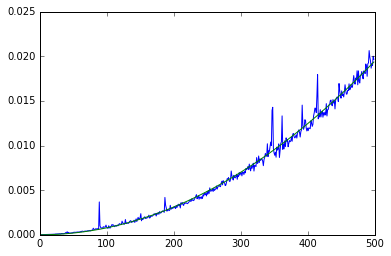

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from math import *
def g(x,a):
    return a*x**2
x=[float(v) for v in range(500)]
p,c=curve_fit(np.vectorize(g),x,tpsInsert,[1])
fitCarre=[g(v,p[0]) for v in range(500)]
plt.plot(tpsInsert)
plt.plot(fitCarre)
plt.show()

In [55]:
print(p)

[  8.06726422e-08]


##### Exercice
> Modifier le programme précédent pour "mesurer expérimentalement" la complexité dans le cas où la la liste est déjà triée et dans le cas où elle est "presque" triée (seulement un nombre fixe d'inversions)

<a id='triRapide'></a>
### Tri rapide

Le tri rapide est un tri très utilisé car comme son nom l'indique il est rapide. On peu montrer qu'en moyenne, la complexité du tri rapide est semi-linéaire ($O(n\log(n)$)

#### Algorithme

##### Partitionnement d'un sous-tableau

Le tri rapide repose sur une stratégie de type "diviser pour régner". Il consiste à *partitionner* le tableau à trier, puis à partitionner les sous-tableaux, etc.

Partitionner un tableau consiste à choisir un élément `p` appelé *pivot* que l'on va mettre à sa place dans le tableau. C'est à dire qu'il est supérieur ou égal à tous les éléments situés avant lui et strictement inférieur à tous les éléments situés après lui.

On donne ci-dessous un exemple de partitionnement d'un tableau de quelques valeurs. Le pivot choisi est le 5.

![Partitionnement](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Partition_example.svg/280px-Partition_example.svg.png)

En python, on peut traduire l'algorithme de la manière suivante :

In [67]:
def partitionner(T,pi,di,pivot):
    "Partitionner le sous-tableau contenu entre les indices pi et di en utilisant le pivot fourni"
    # On commence par mettre le pivot à la fin du tableau : échange avec le dernier élément
    T[pivot],T[di] = T[di],T[pivot]
    j=pi  # Position où insérer un élément plus petit que le pivot
    for i in range(pi,di):
        if T[i]<=T[di]:         # T[di] contient le pivot. Si l'élément en cours est plus petit que le pivot
            T[i],T[j]=T[j],T[i] # On le place en position j : échange les éléments i et j
            j=j+1               # le prochain élément plus petit sera mis à droite de celui-ci
    T[di],T[j] = T[j],T[di]     # On place le pivot à sa place
    return j                    # Renvoie la position du pivot

T=[3,7,8,5,2,1,9,5,4]
print(partitionner(T,0,len(T)-1,3))
print(T)

5
[3, 4, 2, 1, 5, 5, 9, 8, 7]


##### Tri rapide

Le tri rapide consiste alors à partitionner successivement les sous-tableaux issus des partitions précédentes. Dans l'exemple précédent on continuerait en partitionnant le sous-tableau `[3,4,2,1,5]` et le sous-tableau `[9,8,7]`. Et ainsi de suite.

En python on obtient la fonction récursive suivante:

In [97]:
from random import *
def choix_pivot(T,pi,di):
    #return di
    return randint(pi,di)

def tri_rapide(T,pi,di):
    pivot = choix_pivot(T,pi,di)
    sep = partitionner(T,pi,di,pivot)
    if sep-1>pi:
        tri_rapide(T,pi,sep-1)
    if di>sep+1:
        tri_rapide(T,sep+1,di)
    return T

# Test de la fonction
from random import *
T=[randint(0,100) for i in range(20)] # Une liste de 20 nombres entiers aléatoires 
print(T)
tri_rapide(T,0,len(T)-1)
print(T)

[33, 91, 59, 84, 74, 100, 68, 90, 59, 60, 80, 15, 23, 52, 68, 53, 8, 14, 0, 19]
[0, 8, 14, 15, 19, 23, 33, 52, 53, 59, 59, 60, 68, 68, 74, 80, 84, 90, 91, 100]


#### Complexité

In [99]:
from random import *
import timeit

def tri_rap(T):
    return tri_rapide(T,0,len(T)-1)

def sansArgumentTabl(f,T):
    def fonc():
        return f(T)
    return fonc

def tableau_aleat(n):
    return [randint(0,1000000) for i in range(n)]

tpsRapide=[]
for i in range(2,500):
    T=tableau_aleat(i)
    tpsRapide.append(timeit.timeit(sansArgumentTabl(tri_rap,T),number=3))
    


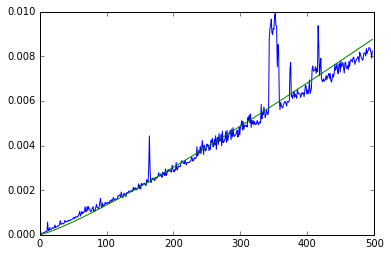

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from math import *
def g(x,a):
    return a*x*log(x)
x=[float(v) for v in range(2,500)]
p,c=curve_fit(np.vectorize(g),x,tpsRapide,[1])
fitSemiLin=[g(v,p[0]) for v in range(2,500)]
plt.plot(tpsRapide)
plt.plot(fitSemiLin)
plt.show()

<a id='triFusion'></a>
### Tri fusion

Le tri fusion repose également sur une stratégie de type "diviser pour régner" suivant l'algorithme ci-dessous:
 
 1) On sépare la liste à trier en deux parties L1 et L2
 
 2) Si L1 contient plus d'un élément, on la trie (point 1)
 
 3) Si L2 contient plus d'un élément, on la trie (point 1)
 
 4) On fusionne les deux listes triées.
 
![Tri fusion](https://upload.wikimedia.org/wikipedia/commons/6/60/Mergesort_algorithm_diagram.png)
 
Pour utiliser cet algorithme on aura besoin d'une fonction auxiliaire `fusion(L1,L2)` qui fusionne deux listes `L1` et `L2` triées.

In [4]:
def fusion(L1,L2):
    res=[]
    i=0
    j=0
    while i<len(L1) or j<len(L2) :
        if j==len(L2):
            res.append(L1[i])
            i=i+1
        elif i==len(L1):
            res.append(L2[j])
            j=j+1
        else:
            if L1[i]<L2[j]:
                res.append(L1[i])
                i=i+1
            else:
                res.append(L2[j])
                j=j+1
    return res

print(fusion([1,5,9,14],[4,8,10,45,46]))

[1, 4, 5, 8, 9, 10, 14, 45, 46]


L'algorithme de tri fusion s'écrit alors facilement de manière récursive: 

In [9]:
def triFusion(L):
    if len(L)<2:
        return L
    else:
        m=int(len(L)/2)
        L1=L[0:m]
        L2=L[m:]
        return fusion(triFusion(L1),triFusion(L2))
    
print(triFusion([2,6,9,3,5,2,7,10,-1,143]))

[-1, 2, 2, 3, 5, 6, 7, 9, 10, 143]


On peut prouver que l'algorithme s'arrête effectivement car à la taille de la liste à trier diminue strictement à chaque appel récursif.

#### Complexité

La complexité de l'algorithme de fusion de deux listes dont la somme des longueurs est n et linéaire (Car on ne parcourt qu'une fois les deux listes). Notons $C(n)$ la complexité de la fonction `fusion(L1,L2)` où $n=Len(L1)+Len(L2)$

La complexité de la fonction `triFusion(L)` est notée $\Gamma(n)$ avec `n=Len(L)`. $\Gamma(n)$ satisfait la relation de récurence :
$$ \Gamma(n) = C(n)+2\Gamma(n/2) $$

donc en développant cette relation on a :

$$ \Gamma(n) = C(n) + 2C(n/2) + 4C(n/4) + \ldots + 2^kC(n/2^k) + 2^k\Gamma(n/2^{k+1})$$

avec $k=log_2(n)$. Donc 

$$ \Gamma(n) = log_2(n)C(n) + n\Gamma(0) = O(n log(n)) $$

Et ce résultat est le même quel que soit la liste d'entrée. 